- Link to access recommendation app: https://product-recommendation-app-ougv.onrender.com
- Link to GitHub Source Code: https://github.com/mundrapiyush/product-recommendation-app

# Task - 0: Importing and Setting the environment

In [2]:
%pip install nltk
%pip install spacy
%pip install seaborn
%pip install matplotlib
%pip install wordcloud
%pip install scikit-learn
%pip install pandas
%pip install numpy
%pip install imbalanced-learn
%pip install pycaret
%pip install pycaret

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import string
import spacy
from spacy.cli import download
download('en_core_web_sm')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

from pycaret.classification import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics.pairwise import pairwise_distances
import pickle

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl (5.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.26.0 requires numpy<1.27,>=1.21, but you have numpy 2.0.2 which is incompatible.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.0.2 which is incompatible.
pycaret 3.3.2 requires numpy<1.27,>=1.21, but you have numpy 2.0.2 whic

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/piyushmundra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/piyushmundra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/piyushmundra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/Users/piyushmundra/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', 300)
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: '%.5f' % x)
warnings.filterwarnings("ignore")

# Task - 1: Data Cleaning and Pre-Processing

In [5]:
# Load the data dictionary to understand the dataset
data_dictionary_df = pd.read_csv("input-data/sample30_data_dictionary.csv", encoding="latin1")
data_dictionary_df

,Attribute,Attribute Description
0,id,Uniques identity number to identify each unique review given by the user to a particular product in the dataset
1,brand,Name of the brand of the product to which user has given review and rating
2,categories,"Category of the product like household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products, health care products and many more."
3,manufacturer,Name of the manufacturer of the product
4,name,Name of the product to which user has added review or rating
5,reviews_date,Date on which the review has been added by the user
6,reviews_didPurchase,Whether a particular user has purchased the product or not
7,reviews_doRecommend,Whether a particular user has recommended the product or not
8,reviews_rating,Rating given by the user to a particular product
9,reviews_text,Review given by the user to a particular product


In [6]:
# Load the dataset
data_df = pd.read_csv("input-data/sample30.csv")
data_df.shape
data_df.head(20)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things up in the bedroom and we were both highly disappointed in this product. We bought this one because we absolutely love the ky yours and mine and we thought this would have a similar affect but it did absolutely nothing. Do not buy.,Not worth it,NaN,NaN,samantha,Negative
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,False,1,Bought this earlier today and was excited to check it out. Based on the product description I was expecting something but it was just like the regular KY. We are fans of the his and hers so we just expected more and were left a little disappointed.,Disappointing,NaN,NaN,raeanne,Negative
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,False,1,I bought this product for my husband and I to try and we were not impressed at all. There was no tingling or warming. It left us both very sticky. I have used KY products in the past (loved KY his and hers) but this one was disappointing.,Not happy at all,NaN,NaN,kimmie,Negative
8,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-03-28T00:00:00.000Z,False,False,1,My husband and I bought this for some extra fun. We werevboth extremely disappointed. Especially for the price! Do not waste your money on this product. We f

In [7]:
# Check for missing values in the dataset
missing_percentage = data_df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print(missing_percentage)

reviews_userProvince   99.43333
reviews_userCity       93.57000
reviews_didPurchase    46.89333
reviews_doRecommend     8.56667
reviews_title           0.63333
manufacturer            0.47000
reviews_username        0.21000
reviews_date            0.15333
user_sentiment          0.00333
dtype: float64


In [8]:
# Clean the dataset by dropping unnecessary columns or rows with excessive missing values
clean_data_df = data_df.copy()

# Drop columns `reviews_userProvince`, `reviews_userCity`, `reviews_didPurchase` as they have high missing values
clean_data_df.drop(columns=['reviews_userProvince', 'reviews_userCity', 'reviews_didPurchase'], inplace=True)

# Drop the `id` column as it is not needed for analysis
clean_data_df.drop(columns=['id'], inplace=True)

In [9]:
# Check for missing values in the dataset
missing_percentage = clean_data_df.isna().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print(missing_percentage)

reviews_doRecommend   8.56667
reviews_title         0.63333
manufacturer          0.47000
reviews_username      0.21000
reviews_date          0.15333
user_sentiment        0.00333
dtype: float64


In [ ]:
# Combine `manufacturer`, `brand` and `name` into a single column `manufacturer_brand_name`
clean_data_df['manufacturer_brand_name'] = clean_data_df['manufacturer'].astype(str) + ' # ' + clean_data_df['brand'].astype(str) + ' # ' + clean_data_df['name'].astype(str)

# Combine `reviews_title` and `reviews_text` into a single column `reviews`
clean_data_df['reviews'] = clean_data_df['reviews_title'].astype(str) + ' # ' + clean_data_df['reviews_text'].astype(str)

# Drop the `reviews_title` and `reviews_text` columns as they are now combined into `reviews`
clean_data_df.drop(columns=['reviews_title', 'reviews_text'], inplace=True)

# Drop the `manufacturer` and `brand` columns as they are now combined into `manufacturer_brand`
clean_data_df.drop(columns=['manufacturer', 'brand', 'name'], inplace=True)

In [11]:
# Check for missing values in the dataset
missing_percentage = clean_data_df.isna().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print(missing_percentage)

reviews_doRecommend   8.56667
reviews_username      0.21000
reviews_date          0.15333
user_sentiment        0.00333
dtype: float64


In [12]:
# Drop the rows with missing values in the `reviews_date` column
clean_data_df.dropna(subset=['reviews_date'], inplace=True)

# Drop the rows with missing values in the `reviews_username` column
clean_data_df.dropna(subset=['reviews_username'], inplace=True)

# Drop the rows with missing values in the `user_sentiment` column
clean_data_df.dropna(subset=['user_sentiment'], inplace=True)

In [13]:
# Check for missing values in the dataset again
missing_percentage = clean_data_df.isna().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print(missing_percentage)

reviews_doRecommend   8.36567
dtype: float64


<Axes: title={'center': 'Distribution of reviews_doRecommend across user_sentiment'}, xlabel='user_sentiment'>

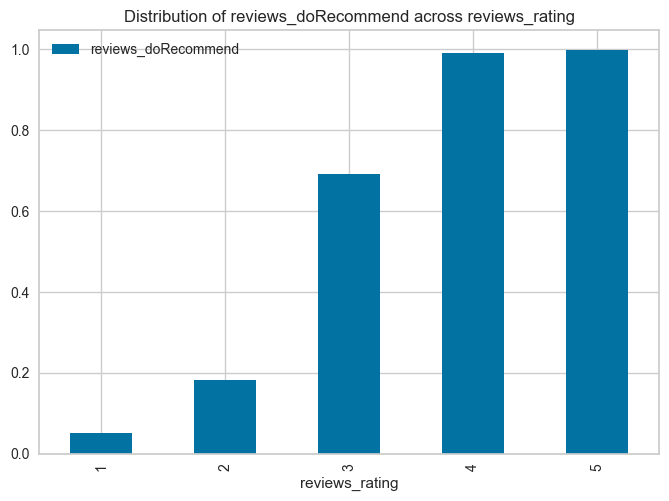

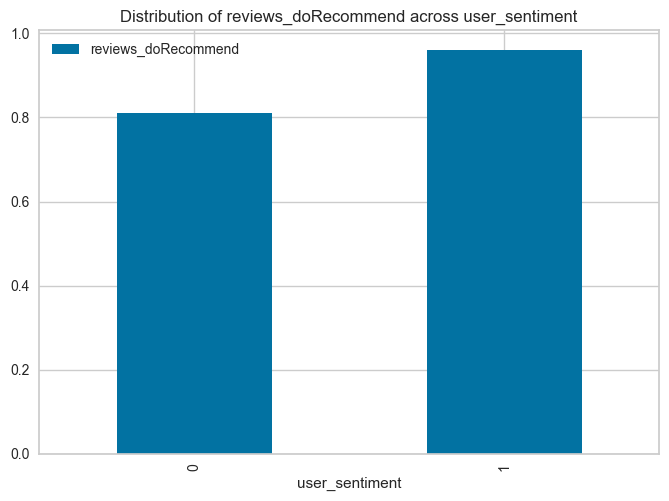

In [14]:
# reviews_doRecommend column has a lot of missing values. Dropping the rows with missing values in this column will lead to a significant loss of data.
# Instead we analyse the relationship between `reviews_doRecommend` and `user_sentiment` and `reviews_rating` to understand the distribution of `reviews_doRecommend`.
# This will help us impute the missing values in the `reviews_doRecommend` column later if needed.

# Create a dataframe with `reviews_doRecommend`, `user_sentiment`, and `reviews_rating` columns
reviews_doRecommend_df = clean_data_df[['reviews_doRecommend', 'user_sentiment', 'reviews_rating']].copy()

# Create a dataframe with `reviews_doRecommend` as not `NaN`
reviews_doRecommend_df = reviews_doRecommend_df[reviews_doRecommend_df['reviews_doRecommend'].notna()]

# Convert `user_sentiment` to numeric values
reviews_doRecommend_df['user_sentiment'] = reviews_doRecommend_df['user_sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# Convert `reviews_doRecommend` to numeric values
reviews_doRecommend_df['reviews_doRecommend'] = reviews_doRecommend_df['reviews_doRecommend'].apply(lambda x: 1 if x == True else 0)

# Distribution of `reviews_doRecommend` across `reviews_rating`
reviews_doRecommend_distribution = reviews_doRecommend_df.groupby('reviews_rating')['reviews_doRecommend'].mean().reset_index()

# Plotting the distribution
reviews_doRecommend_distribution.plot(x='reviews_rating', y='reviews_doRecommend', kind='bar', title='Distribution of reviews_doRecommend across reviews_rating')

# Distribution of `reviews_doRecommend` across `user_sentiment`
reviews_doRecommend_sentiment_distribution = reviews_doRecommend_df.groupby('user_sentiment')['reviews_doRecommend'].mean().reset_index()

# Plotting the distribution
reviews_doRecommend_sentiment_distribution.plot(x='user_sentiment', y='reviews_doRecommend', kind='bar', title='Distribution of reviews_doRecommend across user_sentiment')

In [15]:
# Impute the missing values in `reviews_doRecommend` with True if `user_sentiment` is Positive and `reviews_rating` is greater than or equal to 4
clean_data_df['reviews_doRecommend'] = clean_data_df.apply(
    lambda row: True if pd.isna(row['reviews_doRecommend']) and row['user_sentiment'] == 'Positive' and row['reviews_rating'] >= 4 else False,
    axis=1
)

clean_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29896 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   categories               29896 non-null  object
 1   reviews_date             29896 non-null  object
 2   reviews_doRecommend      29896 non-null  bool  
 3   reviews_rating           29896 non-null  int64 
 4   reviews_username         29896 non-null  object
 5   user_sentiment           29896 non-null  object
 6   manufacturer_brand_name  29896 non-null  object
 7   reviews                  29896 non-null  object
dtypes: bool(1), int64(1), object(6)
memory usage: 1.9+ MB


# Performing EDA

In [16]:
clean_data_df.head(5)

,categories,reviews_date,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,manufacturer_brand_name,reviews
0,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",2012-11-30T06:21:45.000Z,True,5,joshua,Positive,Universal Music Group / Cash Money # Universal Music # Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome # i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.
1,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",2017-07-09T00:00:00.000Z,True,5,dorothy w,Positive,Lundberg # Lundberg # Lundberg Organic Cinnamon Toast Rice Cakes,Good # Good flavor. This review was collected as part of a promotion.
2,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",2017-07-09T00:00:00.000Z,True,5,dorothy w,Positive,Lundberg # Lundberg # Lundberg Organic Cinnamon Toast Rice Cakes,Good # Good flavor.
3,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",2016-01-06T00:00:00.000Z,False,1,rebecca,Negative,K-Y # K-Y # K-Y Love Sensuality Pleasure Gel,"Disappointed # I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensatio..."
4,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",2016-12-21T00:00:00.000Z,False,1,walker557,Negative,K-Y # K-Y # K-Y Love Sensuality Pleasure Gel,Irritation # My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.


<Axes: title={'center': 'Distribution of reviews_rating'}, xlabel='reviews_rating'>

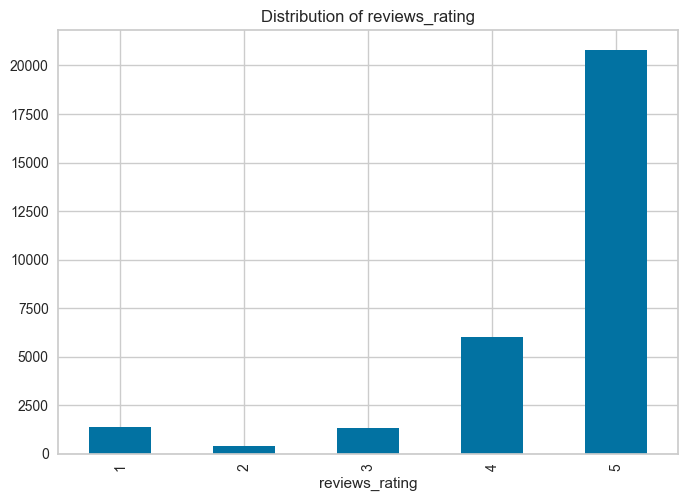

In [ ]:
# Distribution of `reviews_rating`
# The data is highly imbalanced with a majority of reviews having a rating of 5.
reviews_rating_distribution = clean_data_df['reviews_rating'].value_counts().sort_index()
reviews_rating_distribution.plot(kind='bar', title='Distribution of reviews_rating')

<Axes: title={'center': 'Distribution of reviews_doRecommend'}, xlabel='reviews_doRecommend'>

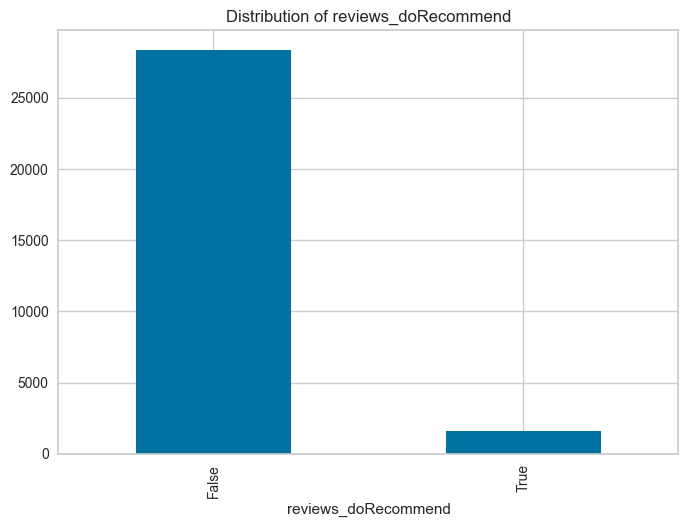

In [ ]:
# Distribution of `reviews_doRecommend`
# The data is highly imbalanced with a majority of reviews not recommending the product.
reviews_doRecommend_distribution = clean_data_df['reviews_doRecommend'].value_counts().sort_index()
reviews_doRecommend_distribution.plot(kind='bar', title='Distribution of reviews_doRecommend')

<Axes: title={'center': 'Distribution of user_sentiment'}, xlabel='user_sentiment'>

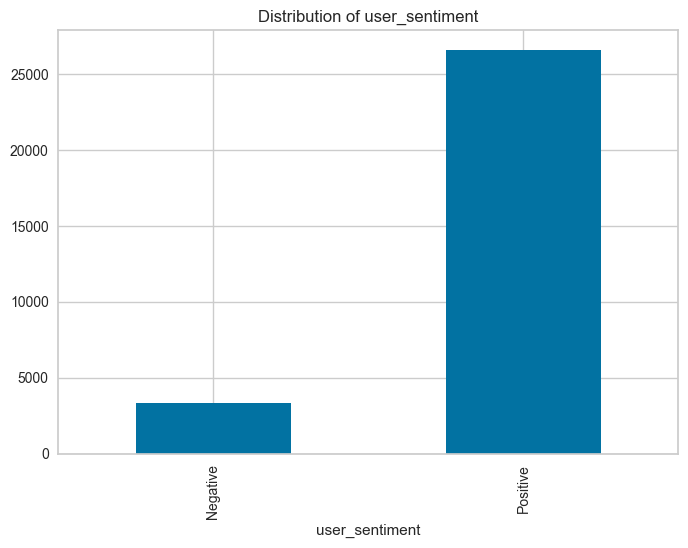

In [ ]:
# Distribution of `user_sentiment`
# The data is highly imbalanced with a majority of reviews being Positive.
user_sentiment_distribution = clean_data_df['user_sentiment'].value_counts().sort_index()
user_sentiment_distribution.plot(kind='bar', title='Distribution of user_sentiment')

<Axes: title={'center': 'Top 10 categories with highest distribution'}, xlabel='categories'>

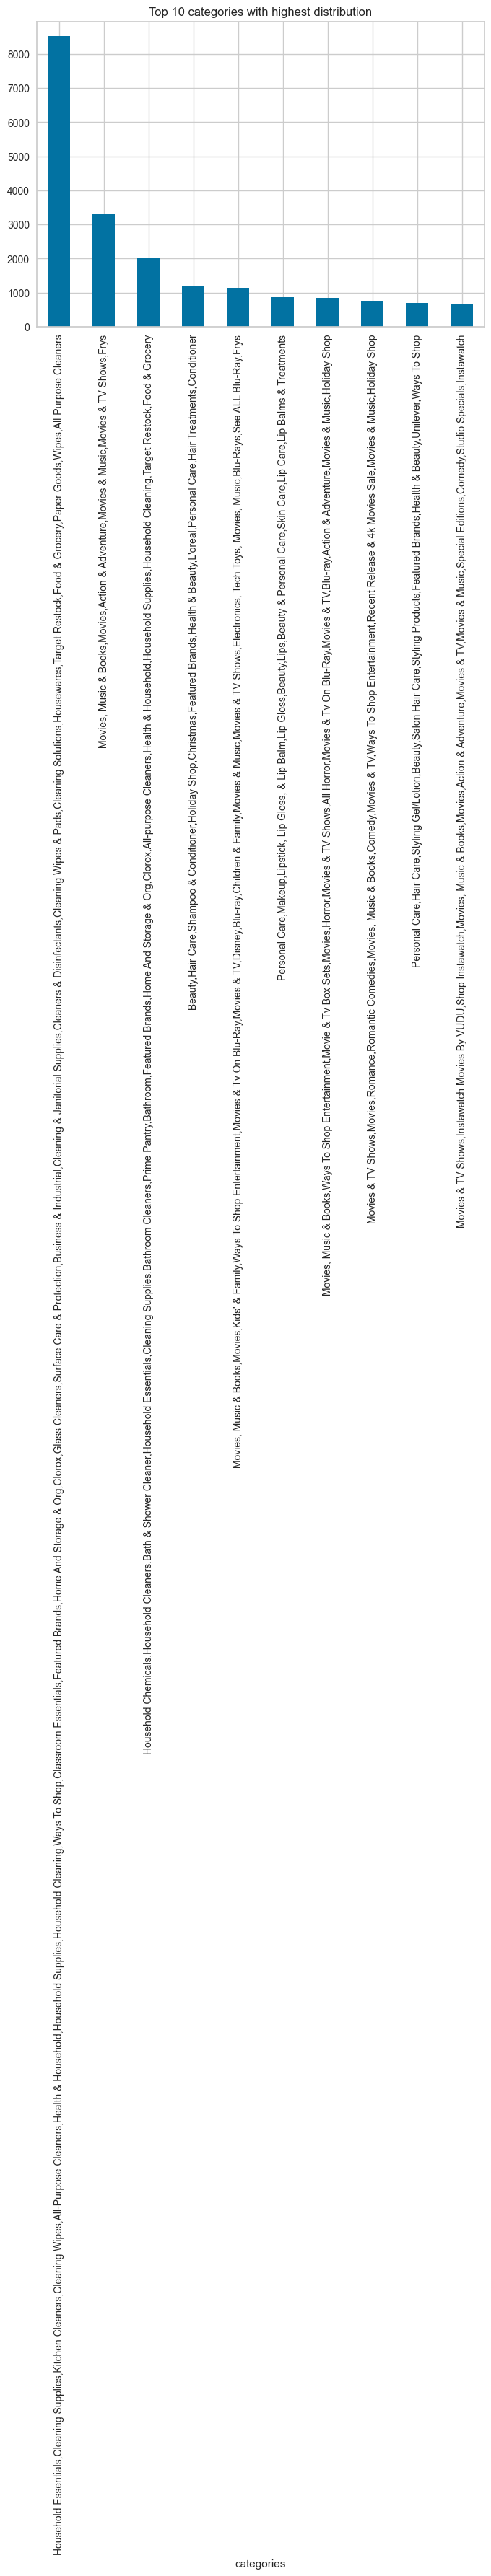

In [ ]:
# Top 10 categories with highest distribution
top_categories = clean_data_df['categories'].value_counts().head(10)
top_categories.plot(kind='bar', title='Top 10 categories with highest distribution')    

<Axes: title={'center': 'Top 10 manufacturer_brand_product with highest distribution of user_sentiment'}, xlabel='manufacturer_brand_name'>

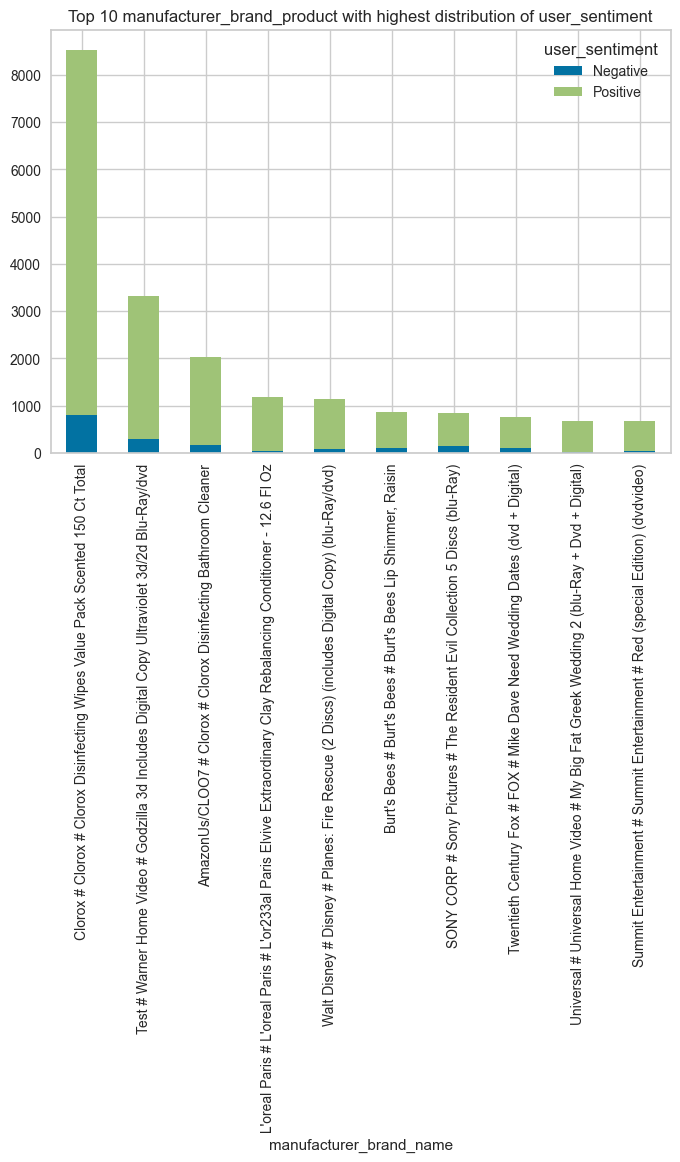

In [ ]:
# Top 5 of `manufacturer_brand` with highest distribution of `user_sentiment`
top_manufacturer_brand_sentiment = clean_data_df.groupby('manufacturer_brand_name')['user_sentiment'].value_counts().unstack().fillna(0)
top_manufacturer_brand_sentiment = top_manufacturer_brand_sentiment.sort_values(by='Positive', ascending=False).head(10)
top_manufacturer_brand_sentiment.plot(kind='bar', stacked=True, title='Top 10 manufacturer_brand_product with highest distribution of user_sentiment')

# Task - 2: Text Processing

In [17]:
# Function to clean the text and remove all the unnecessary elements.
def clean_text(text):
    # remove numbers
    text = re.sub(r'\d+', '', text)
    
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # remove whitespaces
    text = text.strip()
    
    # remove text in square brackets and parenthesis
    text = re.sub(r'\[.*?\]', '', text)
    
    # remove text in parenthesis
    text = re.sub(r'\(.*?\)', '', text)
    
    # remove text in curly brackets
    text = re.sub(r'\{.*?\}', '', text)
    
    # perform lowercase
    text = text.lower()
   
    return text

In [18]:
model = spacy.load('en_core_web_sm')

# Function to Lemmatize the texts
def lemmatize_text(text):
    doc = model(text)
    return " ".join([token.lemma_ for token in doc])

In [ ]:
# Cleaning the reviews text by removing unnecessary elements and then lemmatizing the text

# Clean the text
clean_data_df['reviews_cleaned'] = clean_data_df['reviews'].apply(clean_text)

# # Lemmatize the text and add a new column reviews_lemmatized
clean_data_df['reviews_lemmatized'] = clean_data_df['reviews_cleaned'].apply(lemmatize_text)

clean_data_df.head(5)

# Save the cleaned data in pickle format. This cleaned data will be used during model development and inferencing
with open('interim-data/cleaned_data.pkl', 'wb') as file:
    pickle.dump(clean_data_df, file)

# Task - 3: Feature Extraction

In [ ]:
# Create TF-IDF features for the `reviews_lemmatized` column
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.95, stop_words='english', ngram_range=(1,2))
tfidf_matrix = tfidf_vectorizer.fit_transform(clean_data_df['reviews_lemmatized'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the shape of TF-IDF DataFrame
tfidf_df.shape

# Save the TF-IDF DataFrame in pickle format. This TF-IDF data will be used during model development and inferencing.
with open('interim-data/tfidf_data.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

In [67]:
X = tfidf_df.fillna(0)
y = clean_data_df['user_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape) 

Shape of X_train: (23916, 15959)
Shape of X_test: (5980, 15959)
Shape of y_train: (23916,)
Shape of y_test: (5980,)


In [ ]:
# Over Sampling using SMOTE to prevent the class imbalance issue caused due to the distribution of user_sentiment
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_train_sm:", X_train_sm.shape)
print("Shape of y_train_sm:", y_train_sm.shape)
print("Distribution of y_train:", Counter)
print("Distribution of y_train_sm:", Counter(y_train_sm))

Shape of X_train: (23916, 15959)
Shape of y_train: (23916,)
Shape of X_train_sm: (42466, 15959)
Shape of y_train_sm: (42466,)
Distribution of y_train: <class 'collections.Counter'>
Distribution of y_train_sm: Counter({'Positive': 21233, 'Negative': 21233})


# Task - 4: Model Building and Evaluation

We will perform model building on the clean dataset that contains the extracted features and user sentiments.
We will primarily evaluate 3 models:
- Logistic Regression (with and without) hypertuning
- Random Forest (with and without) hypertuning
- XGBoost (with and without) hypertuning

In [70]:
def get_classification_metrics_table(y_train, y_train_pred, y_test, y_test_pred):
    train_metrics = {
        "Dataset": "Train Data",
        "Recall": recall_score(y_train, y_train_pred, average='weighted'),
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred, average='weighted'),
        "F1 Score": f1_score(y_train, y_train_pred, average='weighted')
    }
    
    test_metrics = {
        "Dataset": "Test Data",
        "Recall": recall_score(y_test, y_test_pred, average='weighted'),
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_test_pred, average='weighted')
    }
    return pd.DataFrame([train_metrics, test_metrics])

## Logistic Regression Model

In [71]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model_classifier = lr_model.fit(X_train_sm, y_train_sm)
y_train_predicted = lr_model_classifier.predict(X_train_sm)
y_test_predicted = lr_model_classifier.predict(X_test)
print("Evaluation Score Comparison:")
get_classification_metrics_table(y_train_sm, y_train_predicted, y_test, y_test_predicted)

Evaluation Score Comparison:


,Dataset,Recall,Accuracy,Precision,F1 Score
0,Train Data,0.94907,0.94907,0.95069,0.94902
1,Test Data,0.87625,0.87625,0.90827,0.88776


In [72]:
# Save the model in pickle format
with open('models/lr_model_classifier.pkl', 'wb') as file:
    pickle.dump(lr_model_classifier, file)

### Logistic Regression With Hypertuning Enabled

In [ ]:
# Run logistic regression model with hyperparameter tuning using Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}
grid_search = GridSearchCV(lr_model, 
                           param_grid, 
                           cv=5, 
                           scoring='f1_weighted', 
                           verbose=2, 
                           n_jobs=-1)
grid_search.fit(X_train_sm, y_train_sm)
print("Best parameters from Grid Search:", grid_search.best_params_)
print("Best score from Grid Search:", grid_search.best_score_)
y_train_predicted = grid_search.predict(X_train_sm)
y_test_predicted = lr_model_classifier.predict(X_test)
print("Evaluation Score Comparison:")
get_classification_metrics_table(y_train_sm, y_train_predicted, y_test, y_test_predicted)

In [74]:
print("Evaluation Score Comparison:")
get_classification_metrics_table(y_train_sm, y_train_predicted, y_test, y_test_predicted)

Evaluation Score Comparison:


,Dataset,Recall,Accuracy,Precision,F1 Score
0,Train Data,0.99805,0.99805,0.99805,0.99805
1,Test Data,0.87625,0.87625,0.90827,0.88776


In [75]:
# Save the model in pickle format
with open('models/lr_model_classifier_grid_search.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

## Random Forest Model

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model_classifier = rf_model.fit(X_train_sm, y_train_sm)
y_train_predicted = rf_model_classifier.predict(X_train_sm)
y_test_predicted = rf_model_classifier.predict(X_test)

In [77]:
print("Evaluation Score Comparison:")
get_classification_metrics_table(y_train_sm, y_train_predicted, y_test, y_test_predicted)

Evaluation Score Comparison:


,Dataset,Recall,Accuracy,Precision,F1 Score
0,Train Data,0.99991,0.99991,0.99991,0.99991
1,Test Data,0.90552,0.90552,0.89490,0.89819


In [78]:
# Save the model in pickle format
with open('models/rf_model_classifier.pkl', 'wb') as file:
    pickle.dump(rf_model_classifier, file)  

### Random Forest With Hypertuning Enabled

In [ ]:
params = {
    'max_depth': [2, 3, 5, 10 , 20, 50],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'n_estimators': [10, 25, 50, 100]
}
rf_gridcv_classifier = GridSearchCV(estimator = rf_model, 
                                      param_grid = params, 
                                      cv = 4, 
                                      n_jobs = -1, 
                                      verbose = 2, 
                                      scoring = "f1_weighted")

rf_gridcv_classifier.fit(X_train, y_train)
rf_model = rf_gridcv_classifier.best_estimator_

y_train_predicted = rf_model.predict(X_train)
y_test_predicted = rf_model.predict(X_test)

In [80]:
print("Evaluation Score Comparison:")
get_classification_metrics_table(y_train, y_train_predicted, y_test, y_test_predicted)

Evaluation Score Comparison:


,Dataset,Recall,Accuracy,Precision,F1 Score
0,Train Data,0.89078,0.89078,0.90275,0.84216
1,Test Data,0.88946,0.88946,0.90170,0.83842


In [81]:
# Save the model in pickle format
with open('models/rf_model_classifier_grid_search.pkl', 'wb') as file:
    pickle.dump(rf_gridcv_classifier, file) 

## XGBoost Model

In [82]:
%pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode target variable
le = LabelEncoder()
y_train_sm_encoded = le.fit_transform(y_train_sm)
y_test_encoded = le.transform(y_test)

xgb_model = XGBClassifier(random_state=42)
xgb_model_classifier = xgb_model.fit(X_train_sm, y_train_sm_encoded)
y_train_predicted = xgb_model_classifier.predict(X_train_sm)
y_test_predicted = xgb_model_classifier.predict(X_test)

# Decode predictions back to original labels for metrics
y_train_predicted_decoded = le.inverse_transform(y_train_predicted)
y_test_predicted_decoded = le.inverse_transform(y_test_predicted)

Python(28712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Evaluation Score Comparison:


In [ ]:
print("Evaluation Score Comparison:")
get_classification_metrics_table(y_train_sm, y_train_predicted_decoded, y_test, y_test_predicted_decoded)

In [ ]:
# Save the model in pickle format
with open('models/xgb_model_classifier.pkl', 'wb') as file:
    pickle.dump(xgb_model_classifier, file)

### XGBoost with Hypertuning Enabled

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [10, 25, 50, 100],
    'max_depth': [2, 3, 5, 10 ,20, 50],
    'scale_pos_weight': [1],
    'gamma': [0.1, 0.5, 1, 1.5, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
}

folds = 5

param_comb = 800

xgb_gridcv_classifier = RandomizedSearchCV(xgb_model, 
                                            param_distributions=params, 
                                            n_iter=param_comb, 
                                            verbose=2, 
                                            scoring='f1_weighted',
                                            n_jobs = -1, 
                                            cv = 5, 
                                            random_state=42)
xgb_gridcv_classifier.fit(X_train_sm, y_train_sm_encoded)

xgboost_model = xgb_gridcv_classifier.best_estimator_
xgboost_model.fit(X_train_sm, y_train_sm_encoded)
y_train_predicted = xgboost_model.predict(X_train_sm)
y_test_predicted = xgboost_model.predict(X_test)

# Decode predictions back to original labels for metrics
y_train_predicted_decoded = le.inverse_transform(y_train_predicted)
y_test_predicted_decoded = le.inverse_transform(y_test_predicted)

print("Evaluation Score Comparison:")
get_classification_metrics_table(y_train_sm, y_train_predicted_decoded, y_test, y_test_predicted_decoded)

# Save the model in pickle format
with open('models/xgb_model_classifier_grid_search.pkl', 'wb') as file:
    pickle.dump(xgboost_model, file)

The evaluation of various models reveals similiar characteristics across different algorithms. 
We choose Logistic Regression for simplicity and explainaibility. 

# Task - 5: Building the Recommendation System

In [24]:
# To build the recommendation system we need to analyze the relationship between users, products, and their ratings.
# We will create a recommendation dataframe with `reviews_username`, `reviews_rating`, and `manufacturer_brand_name` columns.
# This will help us in building a recommendation system based on user ratings and product brands.

recommendation_df = clean_data_df[['reviews_username', 'reviews_rating', 'manufacturer_brand_name']].copy()
recommendation_df.rename(columns={'reviews_username': 'username',
                                  'reviews_rating': 'rating',
                                  'manufacturer_brand_name': 'product'}, inplace=True)
train_recommendation_df, test_recommendation_df = train_test_split(recommendation_df, test_size=0.20, random_state=42)
print("Shape of train_recommendation_df:", train_recommendation_df.shape)
print("Shape of test_recommendation_df:", test_recommendation_df.shape)

Shape of train_recommendation_df: (23916, 3)
Shape of test_recommendation_df: (5980, 3)


In [29]:
# We will create a dummy recommentation frame with the purpose of evaluation.
# This will help us in evaluating the recommendation system based on user ratings and product brands.
# The dummy recommendation frame will have rating as 0 for all the users who have already rated any product.

# We first pivot the table against 'username'
dummy_train_recommendation_df = train_recommendation_df.copy()
dummy_train_recommendation_df['rating'] = dummy_train_recommendation_df['rating'].apply(lambda x: 0 if x >= 1 else 1)
dummy_train_recommendation_pivot_df = dummy_train_recommendation_df.pivot_table(
    index='username',
    columns='product',
    values='rating'
).fillna(1)
print("Shape of dummy_train_recommendation_pivot_df:", dummy_train_recommendation_pivot_df.shape)
dummy_train_recommendation_pivot_df.head(5)

Shape of dummy_train_recommendation_pivot_df: (20537, 261)


product,120 # Brownline # 2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,120 # No Brand # Craft Punch Giga Scallop Circle 45 24687534 To 334,120 # Pioneer # Post Bound Jumbo Album - Burgundy (11x14),"1200 # Storkcraft # Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish",20th Century Fox # FOX # There's Something About Mary (dvd),"AUSTRALIAN GOLD PRODUCTS LTD. # Australian Gold # Australian Gold Exotic Blend Lotion, SPF 4",Allure Home # No Brand # Charcoal Stone Toothbrush Holder Gray,AmazonUs/CLOO7 # Clorox # Clorox Disinfecting Bathroom Cleaner,American Coffee Partnership # Starbucks # Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,American Pop Corn Co. # Jolly Time # Jolly Time Select Premium Yellow Pop Corn,Annie's Homegrown # Annie's # Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Annies Homegrown # Annie's # Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Arc Abrasives # Hunter Fan # Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,Arrid # Arrid # Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie # Aussie # Aussie Aussome Volume Shampoo, 13.5 Oz","Aveeno Baby # Aveeno # Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery # Avery # Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery Dennison # Avery # Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe # Axe # Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BETTER BUILT # BETTER BUILT # Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",BNRG # Power Crunch # Power Crunch Protein Energy Bar Peanut Butter Creme Original,Barielle # Barielle # Barielle Nail Rebuilding Protein,Baxter of California # Baxter of California # Baxter Of California Cream Pomade,"Beanitos # Beanitos # Beanitos Bean Chips, Simply Pinto Bean","Beautyge Brands USA, Inc. # Creme Of Nature # Creme Of Nature Intensive Conditioning Treatment, 32",...,Universal Studios Home Entertainment # UNIVERSAL HOME ENTERTAINMENT # Heiress (dvd),VOORTMAN COOKIES LIMITED # Voortman # Voortman Sugar Free Fudge Chocolate Chip Cookies,Valmont # Nielsen # Black Front Loading Frame Set (8.5x11) Set Of 12,Vaseline # Vaseline # Vaseline Intensive Care Healthy Hands Stronger Nails,Vogue International # Ogx # Ogx Anti-breakage Keratin Oil 3 Minute Miraculous Recovery,"Vogue International # Ogx # Ogx Conditioner, Hydrating Teatree Mint",Wagan # Wagan # Wagan Smartac 80watt Inverter With Usb,Walt Disney # Disney # Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),Walt Disney Records # UMGD # Various Artists - Choo Choo Soul (cd),Warner Home Video # Warner Bros. # 100:Complete First Season (blu-Ray),Warner Home Video # Warner Manufacturing # Scooby Doo And The Loch Ness Monster (blu-Ray),"Way Basics # Way Basics # Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech # Weather Tech # WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda # Weleda # Weleda Everon Lip Balm,Wholesale Interiors # Baxton Studio # Greyson Vintage Industrial Occasional Cocktail Coffee Table - Antique Bronze - Baxton Studio,"William H Harvey # SLOAN VALVE COMPANY # Sloan Royal Urinal Flush Valve, 1.0 Gpf, Royal 186-1",Wilton # Wilton # Wilton Black Dots Standard Baking Cups,Windex # Windex # Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Wmu # Hortense B. Hewitt # Wedding Wishes Wedding Guest Book,Xenon # Target.com Use Only # Black Sister's Revenge (dvd),Yes To Inc. # Yes to Carrots # Yes To Carrots Nourishing Body Wash,"Yes To, Inc # Yes to Grapefruit # Yes To Grapefruit Rejuvenating Body Wash",York Wallcoverings # Roommates # Roommates No Place Like Home Peel Stick Wall Decals,Yosemite Home Decor # Yosemite Home Decor # Pocket Watch Wall Clock Distressed Black - Yosemite Home

In [30]:
# The train_recommendation_pivot_df is a dataframe pivoted against username.
# This dataframe will be used to train the User-User based recommendation System. 
train_recommendation_pivot_df = train_recommendation_df.pivot_table(
    index='username',
    columns='product',
    values='rating'
).fillna(0)
print("Shape of train_recommendation_pivot_df:", train_recommendation_pivot_df.shape)
train_recommendation_pivot_df.head(5)

Shape of train_recommendation_pivot_df: (20537, 261)


product,120 # Brownline # 2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,120 # No Brand # Craft Punch Giga Scallop Circle 45 24687534 To 334,120 # Pioneer # Post Bound Jumbo Album - Burgundy (11x14),"1200 # Storkcraft # Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish",20th Century Fox # FOX # There's Something About Mary (dvd),"AUSTRALIAN GOLD PRODUCTS LTD. # Australian Gold # Australian Gold Exotic Blend Lotion, SPF 4",Allure Home # No Brand # Charcoal Stone Toothbrush Holder Gray,AmazonUs/CLOO7 # Clorox # Clorox Disinfecting Bathroom Cleaner,American Coffee Partnership # Starbucks # Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,American Pop Corn Co. # Jolly Time # Jolly Time Select Premium Yellow Pop Corn,Annie's Homegrown # Annie's # Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Annies Homegrown # Annie's # Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Arc Abrasives # Hunter Fan # Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,Arrid # Arrid # Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie # Aussie # Aussie Aussome Volume Shampoo, 13.5 Oz","Aveeno Baby # Aveeno # Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery # Avery # Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery Dennison # Avery # Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe # Axe # Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BETTER BUILT # BETTER BUILT # Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",BNRG # Power Crunch # Power Crunch Protein Energy Bar Peanut Butter Creme Original,Barielle # Barielle # Barielle Nail Rebuilding Protein,Baxter of California # Baxter of California # Baxter Of California Cream Pomade,"Beanitos # Beanitos # Beanitos Bean Chips, Simply Pinto Bean","Beautyge Brands USA, Inc. # Creme Of Nature # Creme Of Nature Intensive Conditioning Treatment, 32",...,Universal Studios Home Entertainment # UNIVERSAL HOME ENTERTAINMENT # Heiress (dvd),VOORTMAN COOKIES LIMITED # Voortman # Voortman Sugar Free Fudge Chocolate Chip Cookies,Valmont # Nielsen # Black Front Loading Frame Set (8.5x11) Set Of 12,Vaseline # Vaseline # Vaseline Intensive Care Healthy Hands Stronger Nails,Vogue International # Ogx # Ogx Anti-breakage Keratin Oil 3 Minute Miraculous Recovery,"Vogue International # Ogx # Ogx Conditioner, Hydrating Teatree Mint",Wagan # Wagan # Wagan Smartac 80watt Inverter With Usb,Walt Disney # Disney # Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),Walt Disney Records # UMGD # Various Artists - Choo Choo Soul (cd),Warner Home Video # Warner Bros. # 100:Complete First Season (blu-Ray),Warner Home Video # Warner Manufacturing # Scooby Doo And The Loch Ness Monster (blu-Ray),"Way Basics # Way Basics # Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech # Weather Tech # WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda # Weleda # Weleda Everon Lip Balm,Wholesale Interiors # Baxton Studio # Greyson Vintage Industrial Occasional Cocktail Coffee Table - Antique Bronze - Baxton Studio,"William H Harvey # SLOAN VALVE COMPANY # Sloan Royal Urinal Flush Valve, 1.0 Gpf, Royal 186-1",Wilton # Wilton # Wilton Black Dots Standard Baking Cups,Windex # Windex # Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Wmu # Hortense B. Hewitt # Wedding Wishes Wedding Guest Book,Xenon # Target.com Use Only # Black Sister's Revenge (dvd),Yes To Inc. # Yes to Carrots # Yes To Carrots Nourishing Body Wash,"Yes To, Inc # Yes to Grapefruit # Yes To Grapefruit Rejuvenating Body Wash",York Wallcoverings # Roommates # Roommates No Place Like Home Peel Stick Wall Decals,Yosemite Home Decor # Yosemite Home Decor # Pocket Watch Wall Clock Distressed Black - Yosemite Home

In [31]:
# The train_recommendation_transposed_pivot_df is a dataframe pivoted against product.
# This dataframe will be used to train the Item-Item based recommendation System. 
train_recommendation_transposed_pivot_df = train_recommendation_df.pivot_table(
    index='username',
    columns='product',
    values='rating'
).fillna(0).T
print("Shape of train_recommendation_transposed_pivot_df:", train_recommendation_transposed_pivot_df.shape)
train_recommendation_transposed_pivot_df.head(5)

Shape of train_recommendation_transposed_pivot_df: (261, 20537)


username,00dog3,00sab00,02dakota,02deuce,0325home,06stidriver,08dallas,1085,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,1234,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123soccermom,123too,127726,12cass12,12gage,132457,13dani,...,zoeellasca,zoey,zokhid,zombiedad80,zombiegirl22,zombiejess,zombiekiller,zone,zoney86,zooey_57,zoomin76,zoso60,zout22389,zowie,zpalma,zsarah,zsazsa,zubb,zulaa118,zuttle,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
product,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
120 # Brownline # 2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
120 # No Brand # Craft Punch Giga Scallop Circle 45 24687534 To 334,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
120 # Pioneer # Post Bound Jumbo Album - Burgundy (11x14),0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"1200 # Storkcraft # Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
20th Century Fox # FOX # There's Something About Mary (dvd),0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


## Task - 5.1: User-Based Recommendation

In [46]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(train_recommendation_pivot_df, metric='cosine')
user_correlation[user_correlation < 0] = 0
user_correlation_df = pd.DataFrame(user_correlation)
print("Shape of user_correlation matrix:", user_correlation.shape)

Shape of user_correlation matrix: (20537, 20537)


In [ ]:
user_predicted_ratings = np.dot(user_correlation, train_recommendation_pivot_df.fillna(0))
user_final_rating = np.multiply(user_predicted_ratings,dummy_train_recommendation_pivot_df)
user_final_rating.head(5)

In [44]:
# Save the user_final_rating DataFrame in pickle format
with open('models/user_based_recommendation.pkl', 'wb') as file:
    pickle.dump(user_final_rating, file)

### Evaluation of User Based Recommendation

In [35]:
# Determine the users that are common across the test and the train dataset
common_users_df = test_recommendation_df[test_recommendation_df.username.isin(train_recommendation_df.username)]
common_users_df.shape

(1514, 3)

In [57]:
common_users_pivot_df = common_users_df.pivot_table(
    index='username',
    columns='product',
    values='rating'
)

In [74]:
# Create a new column called username in the user_correlation_df DataFrame
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df['username'] = train_recommendation_pivot_df.index
user_correlation_df.set_index('username',inplace=True)
user_correlation_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,20512,20513,20514,20515,20516,20517,20518,20519,20520,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530,20531,20532,20533,20534,20535,20536
username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
00sab00,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.94868,0.00000,0.00000,0.00000,0.18506,0.00000,0.00000,0.94868,0.22361,0.00000,0.00000,0.00000,0.00000,0.31623,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.31623,0.00000,0.00000,0.94868,0.31623,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.31623,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.94868,0.00000
02dakota,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.46816,0.00000,0.00000,0.00000,0.70711,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
02deuce,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.46816,0.00000,0.00000,0.00000,0.70711,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0325home,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.46816,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000


In [75]:
# Create a dataframe common_user_correlation_df which contains elements of user_correlation_df where the username is in common_users_list
common_users_list = common_users_df.username.tolist()
common_user_correlation_df = user_correlation_df[user_correlation_df.index.isin(common_users_list)]
common_user_correlation_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,20512,20513,20514,20515,20516,20517,20518,20519,20520,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530,20531,20532,20533,20534,20535,20536
username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
23jen,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.46816,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000
4djs,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.46816,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000
a hutch,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
aalyah,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
aaron,0.00000,0.16978,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.59348,0.00000,0.00000,0.00000,0.37964,0.00000,0.00000,0.00000,0.00000,0.53689,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.53689,0.00000,0.00000,0.00000,0.53689,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.53689,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [78]:
user_correlation_df.T

username,00dog3,00sab00,02dakota,02deuce,0325home,06stidriver,08dallas,1085,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,1234,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123soccermom,123too,127726,12cass12,12gage,132457,13dani,...,zoeellasca,zoey,zokhid,zombiedad80,zombiegirl22,zombiejess,zombiekiller,zone,zoney86,zooey_57,zoomin76,zoso60,zout22389,zowie,zpalma,zsarah,zsazsa,zubb,zulaa118,zuttle,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
0,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.94868,0.00000,0.00000,0.00000,0.18506,0.00000,0.00000,0.94868,0.22361,0.00000,0.00000,0.00000,0.00000,0.31623,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.31623,0.00000,0.00000,0.94868,0.31623,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.31623,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.94868,0.00000
2,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.46816,0.00000,0.00000,0.00000,0.70711,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.46816,0.00000,0.00000,0.00000,0.70711,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.46816,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20532,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.46816,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000
20533,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.46816,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000
20534,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.46816,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000
20535,0.00000,0.94868,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.000

In [80]:
# Filter the user_correlation_df for users that are in common_users_list
# This will help us in building the recommendation system based on common users.
common_user_correlation_df_1 = user_correlation_df[user_correlation_df.index.isin(common_users_list)]
common_user_correlation_df_1.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,20512,20513,20514,20515,20516,20517,20518,20519,20520,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530,20531,20532,20533,20534,20535,20536
username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
23jen,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.46816,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000
4djs,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.46816,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000
a hutch,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
aalyah,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
aaron,0.00000,0.16978,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.59348,0.00000,0.00000,0.00000,0.37964,0.00000,0.00000,0.00000,0.00000,0.53689,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.53689,0.00000,0.00000,0.00000,0.53689,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.53689,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [83]:
common_user_correlation_df_2 = common_user_correlation_df_1[common_user_correlation_df_1.index.isin(common_users_list)]
common_user_correlation_df_2.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,20512,20513,20514,20515,20516,20517,20518,20519,20520,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530,20531,20532,20533,20534,20535,20536
username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
23jen,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.46816,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000
4djs,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.46816,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000
a hutch,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
aalyah,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
aaron,0.00000,0.16978,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.59348,0.00000,0.00000,0.00000,0.37964,0.00000,0.00000,0.00000,0.00000,0.53689,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.53689,0.00000,0.00000,0.00000,0.53689,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.53689,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [41]:
common_user_correlation_df_1 = common_user_correlation_df.T[common_user_correlation_df.T.index.isin(common_users_list)]
common_user_correlation_df_1.head(5)

username,23jen,4djs,a hutch,aalyah,aaron,abbey,abc,abcdefghij,abcssds,abigail,abret,ace24,acellacey,acg1,adelynsmom,adizzione,adma2,adriana9999,afwifey2003,aj1135,aj2012,ajay,ajune,akesler19,aktcharlotte,...,wendy2245,wendy59,whome,wildman,wimbly,windowkitty,winniepoo2,wise,wizard,wolfie,wolverine,wonster67,woowoo,wownostreaks,wowwie,wren113,xmom,yohnie1,yorkielvr,yucky111,yummy,yvonne,zburt5,zebras,zippy


## Task - 5.2: Item-Based Recommendation

In [37]:
# Creating the User Similarity Matrix using pairwise_distance function.
item_correlation = 1 - pairwise_distances(train_recommendation_transposed_pivot_df, metric='cosine')
print("Shape of item_correlation matrix:", item_correlation.shape)
item_predicted_ratings = np.dot(item_correlation, train_recommendation_transposed_pivot_df)
item_final_rating = np.multiply(item_predicted_ratings, dummy_train_recommendation_pivot_df.T)
item_final_rating.shape

Shape of item_correlation matrix: (261, 261)


(261, 20537)

In [38]:
# Save the item_final_rating DataFrame in pickle format
with open('models/item_based_recommendation.pkl', 'wb') as file:
    pickle.dump(item_final_rating, file)

# Task - 6: Recommendation of Top 20 products for a specified user

In [92]:
# Function to get top N recommendations for a user based on item similarity
def get_top_n_recommendations_based_on_item(username, n=5):
    # Get the user's predicted ratings
    item_ratings = item_final_rating[username]
    
    # Sort the ratings in descending order and get the top N recommendations
    top_n_recommendations = item_ratings.sort_values(ascending=False).head(n)
    
    # Get the brand IDs and their corresponding names
    top_n_brands = train_recommendation_df[train_recommendation_df['username'] == username]['product'].unique()
    
    return top_n_recommendations, top_n_brands

# Function to get top N recommendations for a user based on user similarity
def get_top_n_recommendations_based_on_user(username, n=5):
    # Get the user's predicted ratings
    user_ratings = user_final_rating.loc[username]
    
    # Sort the ratings in descending order and get the top N recommendations
    top_n_recommendations = user_ratings.sort_values(ascending=False).head(n)
    
    # Get the brand IDs and their corresponding names
    top_n_brands = train_recommendation_df[train_recommendation_df['username'] == username]['product'].unique()
    
    return top_n_recommendations, top_n_brands

In [95]:
# Example usage
username = 'samantha'
top_n_recommendations, top_n_brands = get_top_n_recommendations_based_on_item(username, n=20)
print(f"Top 20 recommendations for user {username} based on item similarity:")
print(top_n_recommendations)

Top 20 recommendations for user samantha based on item similarity:
product
Universal # Universal Home Video # My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                       0.42291
Queen Helene Skin Cream, Lotion # Queen Helene # Queen Helene Cocoa Butter Solid                              0.39945
Test # Warner Home Video # Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                    0.29495
Lions Gate # Lionsgate Home Entertainment # Equals (blu-Ray)                                                  0.28176
Jarden Home Environment # Holmes # Holmes174 Personal Indoor Heater W/ Manual Controls White 1500w Hfh131-N   0.25848
Walt Disney # Disney # Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                    0.25237
GENERAL MILLS SALES, INC. # Bisquick # Bisquick Original Pancake And Baking Mix - 40oz                        0.22715
IMAN # Iman # Iman Second To None Stick Foundation, Clay 1                                         

In [96]:
# Example usage
username = 'samantha'
top_n_recommendations, top_n_brands = get_top_n_recommendations_based_on_user(username, n=20)
print(f"Top 20 recommendations for user {username} based on user similarity:")
print(top_n_recommendations)

Top 20 recommendations for user samantha based on user similarity:
product
Test # Warner Home Video # Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   103.62334
Universal # Universal Home Video # My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)       76.59024
Walt Disney # Disney # Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)    51.24990
SONY CORP # Sony Pictures # The Resident Evil Collection 5 Discs (blu-Ray)                    38.55899
Clorox # Clorox # Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                   31.15140
AmazonUs/CLOO7 # Clorox # Clorox Disinfecting Bathroom Cleaner                                25.32880
Summit Entertainment # Summit Entertainment # Red (special Edition) (dvdvideo)                22.60400
Windex # Windex # Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                       11.62228
Tostitos # Tostitos # Tostitos Bite Size Tortilla Chips                                       10.6180

# Task - 7: Fine Tuning Recommendation System 

The task uses the User-User based recommendation system to get top 20 product recommendations for a given user.
We filter the original dataframe for the list of top 20 products representing the dataframe which contains just the 

In [109]:
username = '00dog3'

top_n_recommendations, top_n_brands = get_top_n_recommendations_based_on_user(username, n=20)

# Load the cleaned data from pickle file
with open('interim-data/cleaned_data.pkl', 'rb') as file:
    clean_data_df = pickle.load(file)

print(clean_data_df.shape)

# Filter the clean_data_df to get the rows where the manufacturer_brand_name is in top_n_recommendations
filtered_data_df = clean_data_df[clean_data_df['manufacturer_brand_name'].isin(top_n_recommendations.index)]

print(filtered_data_df.shape)

(29896, 10)
(17939, 10)


In [110]:
# Load the vectorizer from pickle file
with open('interim-data/tfidf_data.pkl', 'rb') as file:
    tfidf_vectorizer = pickle.load(file)

# Use the TF-IDF vectorizer to transform the reviews_lemmatized column in filtered_data_df
X = tfidf_vectorizer.transform(filtered_data_df['reviews_lemmatized'].values.astype(str))

# Load the logistic regression model from pickle file
with open('models/lr_model_classifier.pkl', 'rb') as file:
    lr_model_classifier = pickle.load(file)
    
# Use the trained logistic regression model to predict the sentiment for the reviews in filtered_data_df
filtered_data_df['predicted_sentiment'] = lr_model_classifier.predict(X)


# Create a new column to map Positive sentiment to 1 and Negative sentiment to 0. This will allow us to easily summarize the data
filtered_data_df['positive_sentiment'] = filtered_data_df['predicted_sentiment'].apply(lambda x: 1 if x=="Positive" else 0)

# Group by manufacturer_brand_name and get the percentage of positive sentiment
filtered_data_with_sentiments_df = filtered_data_df.groupby('manufacturer_brand_name')['positive_sentiment'].mean().reset_index().sort_values(by='positive_sentiment', ascending=False)

# Get the top 5 manufacturer_brand_name with highest positive sentiment
top_5_products = filtered_data_with_sentiments_df.head(5)

# Split the manufacturer_brand_name value into manufacturer, brand, and name and use only the name for display
top_5_products['name'] = top_5_products['manufacturer_brand_name'].apply(lambda x: x.split(' # ')[-1])

# Format the sentiment percentage for display
top_5_products['sentiment'] = top_5_products['positive_sentiment'].apply(lambda x: f"{x:.2%}") 

# Drop the unnecessary columns
top_5_products.drop(columns=['manufacturer_brand_name'], inplace=True)
top_5_products.drop(columns=['positive_sentiment'], inplace=True)
top_5_products.reset_index(drop=True, inplace=True)

print("Top 5 products with highest positive sentiment:")
top_5_products.head(5)


Top 5 products with highest positive sentiment:


,name,sentiment
0,Sea Gull Lighting Holman One Light Wall/bath Sconce - Brushed Nickel,100.00%
1,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),92.07%
2,"Physicians Formula Mineral Wear Talc-Free Mineral Correcting Powder, Creamy Natural",90.00%
3,Clorox Disinfecting Bathroom Cleaner,89.36%
4,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),87.92%
